In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## species_info

In [2]:
species_info = pd.read_csv('./species/species_info.csv')
species_info.columns

Index(['oldIndex', 'newIndex', 'oldName', 'newName', 'HP', 'phAtk', 'phDef',
       'spAtk', 'spDef', 'speed', 'totalStats', 'type1', 'type2', 'abil1',
       'abil2', 'eggGroup1', 'eggGroup2', 'HPYield', 'phAtkYield',
       'phDefYield', 'spAtkYield', 'spDefYield', 'speedYield', 'expYield',
       'catchRate', 'eggCycles', 'baseHappiness', 'growthRate', 'bodyColor'],
      dtype='object')

18


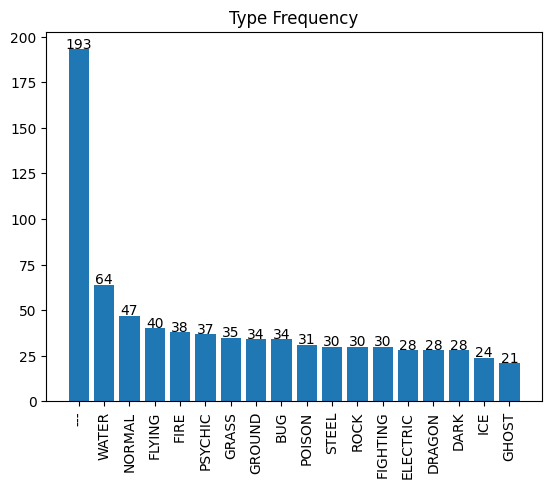

In [3]:
types = list(species_info["type1"]) + list(species_info["type2"])
freq = dict()

for tp in types:
    if tp in freq:
        freq[tp] += 1
    else:
        freq[tp] = 1

print(len(freq))
values = list(freq.values())
categories = list(freq.keys())

zip(values, categories)
data = sorted(zip(values, categories), reverse=True)
values = [i[0] for i in data]
categories = [i[1] for i in data]

plt.bar(categories, values)
plt.title('Type Frequency')
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.xticks(rotation=90)
plt.show()

## evolutions

In [4]:
evolutions = pd.read_csv('./evolutions/evolutions.csv')
evolutions.head()

,baseSpecies,method,param,targetSpecies
0,BULBASAUR,EVO_LEVEL,16,IVYSAUR
1,IVYSAUR,EVO_LEVEL,36,VENUSAUR
2,CHARMANDER,EVO_LEVEL,16,CHARMELEON
3,CHARMELEON,EVO_LEVEL,36,CHARIZARD
4,SQUIRTLE,EVO_LEVEL,16,WARTORTLE


In [5]:
evo1 = evolutions.rename(columns={
    "baseSpecies": "Stage1",
    "targetSpecies": "Stage2"
})

evo2 = evolutions.rename(columns={
    "baseSpecies": "Stage2",
    "targetSpecies": "Stage3"
})

# Join on Stage2 to get full evolution lines
evo_chain = pd.merge(evo1[['Stage1', 'Stage2']], evo2[['Stage2', 'Stage3']], on='Stage2', how='inner')
print("All 3 staged evolution chains:", len(evo_chain))
evo_chain

All 3 staged evolution chains: 49


,Stage1,Stage2,Stage3
0,BULBASAUR,IVYSAUR,VENUSAUR
1,CHARMANDER,CHARMELEON,CHARIZARD
2,SQUIRTLE,WARTORTLE,BLASTOISE
3,CATERPIE,METAPOD,METAMOTH
4,WEEDLE,KAKUNA,BEEDRILL
5,PIDGEY,PIDGEOTTO,PIDGEOT
6,PICHU,PIKACHU,RAICHU
7,NIDORAN,NIDORINA,NIDOQUEEN
8,NIDORAN,NIDORINO,NIDOKING
9,ZUBAT,GOLBAT,CROBAT


## moves_info

In [6]:
moves_info = pd.read_csv('./moves/moves_info.csv')
moves_info.head()

,serial,oldName,newName,type,basePower,accuracy,secondaryEffect,effectChance,PP,priority,target,description,makesContact,protectAffected,magicCoatAffected,snatchAffected,mirrorMoveAffected,kingsRockAffected
0,0,POUND,DRAIN PUNCH,FIGHTING,40,100,ABSORB,0,20,0,SELECTED,A tough attack that drains half the damage it ...,1,1,0,0,1,0
1,1,KARATE_CHOP,KARATE CHOP,FIGHTING,50,100,HIGH_CRITICAL,0,25,0,SELECTED,The foe is attacked with a sharp chop. It has ...,1,1,0,0,1,1
2,2,DOUBLE_SLAP,DOUBLESLAP,NORMAL,30,100,DOUBLE_HIT,0,30,0,SELECTED,The foe is slapped back and forth; two times.,1,1,0,0,1,1
3,3,COMET_PUNCH,BULLET PUNCH,STEEL,40,100,QUICK_ATTACK,0,20,1,SELECTED,A punch thrown at blinding speed. It is certai...,1,1,0,0,1,1
4,4,MEGA_PUNCH,MEGA PUNCH,NORMAL,80,85,HIT,0,20,0,SELECTED,The foe is slugged by a punch thrown with musc...,1,1,0,0,1,1


## movesets

In [7]:
movesets = pd.read_csv('./movesets/movesets.csv')
movesets.head()

,species,level,move
0,BULBASAUR,1,TACKLE
1,BULBASAUR,4,GROWL
2,BULBASAUR,7,LEECH SEED
3,BULBASAUR,10,VINE WHIP
4,BULBASAUR,15,POISONPOWDER


In [10]:
movesets[movesets['species'] == 'SUICUNE']

,species,level,move
2423,SUICUNE,1,BITE
2424,SUICUNE,1,LEER
2425,SUICUNE,11,BUBBLEBEAM
2426,SUICUNE,21,RAIN DANCE
2427,SUICUNE,31,TWISTER
2428,SUICUNE,41,AURORA BEAM
2429,SUICUNE,51,MIST
2430,SUICUNE,61,MIRROR COAT
2431,SUICUNE,71,HYDRO PUMP
2432,SUICUNE,81,CALM MIND


In [9]:
movesets[movesets['move'] == 'MOONLIGHT']

,species,level,move
9,BULBASAUR,39,MOONLIGHT
22,IVYSAUR,47,MOONLIGHT
36,VENUSAUR,53,MOONLIGHT
328,CLEFAIRY,37,MOONLIGHT
395,ODDISH,32,MOONLIGHT
405,GLOOM,35,MOONLIGHT
1986,UMBREON,52,MOONLIGHT
2717,PANVOLT,20,MOONLIGHT
2748,APPLIN,21,MOONLIGHT
3502,CORVIDOC,57,MOONLIGHT
